In [2]:
import tensorflow as tf

###
In this lessonl we'll learn how to build multilayer neural network with the Tensorflow. Adding a hidden layer to a network allows it to model more complex functions. Also, using a non-linear activation function on the hidden layer lets it model non-linear functions.

Next, we'll see how a ReLu hidden layer is implemented in TensorFlow

## TensorFlow ReLUs
Tensorflows provides the ReLu functions as tf.nn.relu(), as shown below

In [11]:
help(tf.nn.relu)

Help on function relu in module tensorflow.python.ops.gen_nn_ops:

relu(features, name=None)
    Computes rectified linear: `max(features, 0)`.
    
    Args:
      features: A `Tensor`. Must be one of the following types: `float32`, `float64`, `int32`, `uint8`, `int16`, `int8`, `int64`, `bfloat16`, `uint16`, `half`, `uint32`, `uint64`, `qint8`.
      name: A name for the operation (optional).
    
    Returns:
      A `Tensor`. Has the same type as `features`.



In [3]:
x=tf.placeholder(tf.string)
y=tf.placeholder(tf.int32)
z=tf.placeholder(tf.float32)

In [4]:
with tf.Session() as sess:
    output_x=sess.run(x,feed_dict={x: 'Test String',y:123,z:45.64})
    output_y=sess.run(y,feed_dict={x:"Test String",y:123,z:45.64})
    print(output_y)

123


In [5]:
# These are mandatory
# create tensorflow object called tensor
hello=tf.constant("Hello world")
# before running we have to declare it
with tf.Session() as sess:
    #Run the tf.constant operation in the session 
    output=sess.run(hello)
    print(output)

b'Hello world'


In [6]:
n_features=120
n_labels=5
weight=tf.Variable(tf.truncated_normal((n_features,n_labels)))

In [7]:
weight

<tf.Variable 'Variable:0' shape=(120, 5) dtype=float32_ref>

In [8]:
print(weight)

<tf.Variable 'Variable:0' shape=(120, 5) dtype=float32_ref>


In [9]:
bias=tf.Variable(tf.zeros(n_labels))  # setting the bias zeros

In [10]:
tf.__version__

'1.12.0'

In [11]:
# Lets's create a simple linear regresssion model using tensorflow

In [14]:
import pandas as pd
import numpy as np


In [15]:
# dataset
df=pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/mtcars.csv")

In [16]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
# we donn't need first column
del df['Unnamed: 0']

In [19]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [20]:
#define the hyper parameters
learning_rate=0.01
epochs=1000   # iterations
display_step=50   # every 50 steps shows the results


In [21]:
# there we are seeing what is the affect of , impact of wt on mpg
train_x=np.asarray(df.wt)
train_y=np.asarray(df.mpg)


In [22]:
train_x

array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
       3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
       1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
       1.513, 3.17 , 2.77 , 3.57 , 2.78 ])

In [23]:
train_y

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [24]:
# number of samples
#If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n. and Y.shape[1] is m.
n_samples=train_x.shape[0]
n_samples

32

In [25]:
# create a tensorflow graph input
X=tf.placeholder("float")
Y=tf.placeholder("float")

In [26]:
# create a model   
W=tf.Variable(np.random.randn(),name='weights')
b=tf.Variable(np.random.randn(),name="bias")

In [27]:
# construction of a linear regression model
#y=wx+b
activation= tf.add(tf.multiply(X,W),b)

In [29]:
# accuracy parameter
# cost function= 1/2 * (y-yhat)^2  divided by N
cost=tf.reduce_sum(tf.pow(activation-Y,2))/(2*n_samples)   # L2 loss function


In [30]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [31]:
#initialize all the variable
init=tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [45]:
# let run the tensorflow
with tf.Session() as sess:
    sess.run(init)
    #fit all training data
    for epoch in range(epochs):
        for (x,y) in zip(train_x,train_y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
            # Display the results
        if epoch % display_step==0:
            print("Epoch",'%04d'% (epoch+1),"cost=", \
                 "{:.9f}".format(sess.run(cost,feed_dict={X:train_x,Y:train_y})),\
                 "W=",sess.run(W),"b=",sess.run(b))
    print("Cost=",sess.run(cost,feed_dict={X:train_x,Y:train_y}),\
           "W=",sess.run(W),"b=",sess.run(b))       

Epoch 0001 cost= 185.560226440 W= 0.58042324 b= 0.061073694
Epoch 0051 cost= 53.651344299 W= 4.5897193 b= 2.6643255
Epoch 0101 cost= 50.039367676 W= 4.2281866 b= 3.9591374
Epoch 0151 cost= 46.692516327 W= 3.8708503 b= 5.202898
Epoch 0201 cost= 43.590953827 W= 3.5268443 b= 6.400182
Epoch 0251 cost= 40.716678619 W= 3.1956916 b= 7.5527387
Epoch 0301 cost= 38.053047180 W= 2.8769078 b= 8.662233
Epoch 0351 cost= 35.584617615 W= 2.5700352 b= 9.730273
Epoch 0401 cost= 33.297080994 W= 2.2746296 b= 10.758413
Epoch 0451 cost= 31.177188873 W= 1.9902639 b= 11.748131
Epoch 0501 cost= 29.212657928 W= 1.7165202 b= 12.70086
Epoch 0551 cost= 27.392024994 W= 1.4530019 b= 13.618023
Epoch 0601 cost= 25.704841614 W= 1.1993318 b= 14.5008955
Epoch 0651 cost= 24.141304016 W= 0.95514446 b= 15.35077
Epoch 0701 cost= 22.692298889 W= 0.72007567 b= 16.168907
Epoch 0751 cost= 21.349475861 W= 0.49379343 b= 16.956467
Epoch 0801 cost= 20.105060577 W= 0.27596834 b= 17.714588
Epoch 0851 cost= 18.951797485 W= 0.066281945 

## Deep learning Network in TensorFlow
We've seen how to build a logistic classifier using Tensorflow. Now we're going to see how to use the logistic classifier to build a deep neural network. In the following walkthrough, we'll step through tensorflow code written to classify the letters in the MNIST database

In [46]:
# so we can write above as
# mpg=wx+b

### Classification example: tensorflow MNIST

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets(".",one_hot=True,reshape=False)

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


In [5]:
# above first two are training,labels are output. 50k images
# above two last are training containing 10k images
import matplotlib.pyplot as plt
import numpy as np
import random as ran

In [6]:
# parameters
learning_rate=0.001
training_epochs=20
batch_size=10   # decrease batch size if you don't have enough memory
display_step=10

In [13]:
n_input=784  # Mnist data input (image shape : 28*28  row by column)
n_classes=10    # mnist total classes (0-9 digits)

In [8]:
n_hidden_layer=256   # number of layer features i.e number of neurons
# The variable n_hidden_layer determines the size of the hidden layer in the neural network.
# This is also known as the width of a layer

In [9]:
# how to do you decide number of neurons in a layer?
10000/785, 10000/(785*2) 
# wehave 10000 features

(12.738853503184714, 6.369426751592357)

In [10]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001DC4BF11CC0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001DC4F0555F8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001DC4F055668>)

In [15]:
# store layers weight and bias
weights={
    "hidden_layer": tf.Variable(tf.random_normal([n_input,n_hidden_layer])),
    "out":tf.Variable(tf.random_normal([n_hidden_layer,n_classes]))
}

biases={
     "hidden_layer": tf.Variable(tf.random_normal([n_hidden_layer])),
    "out":tf.Variable(tf.random_normal([n_classes]))
}


Deep neural networks use multiple layer requiring it's own weight and bias. The 'hidden_layer' weight and bias is for the hidden layer. The 'out' weight and bias is for the output layer. If the neural network were deeper, there would be weights and biases for each additional layer.

## Learning parameters
we'll see the MNIST dataset provided by Tensorflow, which batches and one-Hot encodes the data for you.

In [ ]:
# we've already define the learning parametes  in above cells
# Also, we have define hidden layer parameters above.

In [ ]:
# These below function to learn only. we just see it. but we'll do in different way in belows 
#cells.

In [21]:
def Train_size(num):
    print("total training images in Dataset=" + str(mnist.train.images.shape))
    print("---------------------------------------------------------------")
    x_train=mnist.train.images[:num,:]
    print("x_train Examples loaded = "+str(x_train.shape))
    y_train=mnist.train.labels[:num,:]
    print("y_train Examples loaded =" + str(y_train.shape))
    return x_train,y_train

In [22]:
def Test_size(num):
    print("total test images in Dataset=" + str(mnist.test.images.shape))
    print("---------------------------------------------------------------")
    x_test=mnist.test.images[:num,:]
    print("x_test Examples loaded = "+str(x_test.shape))
    y_test=mnist.test.labels[:num,:]
    print("y_test Examples loaded =" + str(y_test.shape))
    return x_test,y_test

In [23]:
def display_digit(num):
    print(y_train[num])
    label=y_train[num].argmax(axis=0)  # argmax gives the max in array
    image=x_train[num].reshape([28,28])
    plt.title("example: %d label: %d"% (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()

In [24]:
def display_mult_flat(start,stop):
    images=x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images=np.concatenate((images,x_train[i].reshape([1,784])))
    plt.imshow(images,cmap=plt.get_cmap('gray_r'))
    plt.show

In [25]:
x_train,y_train=Train_size(55000)

total training images in Dataset=(55000, 28, 28, 1)
---------------------------------------------------------------
x_train Examples loaded = (55000, 28, 28, 1)
y_train Examples loaded =(55000, 10)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


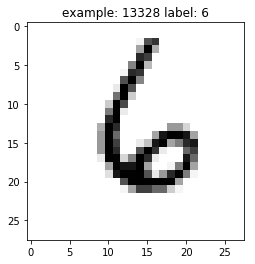

In [26]:
display_digit(ran.randint(0,x_train.shape[0]))

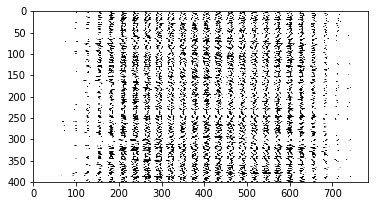

In [27]:
display_mult_flat(0,400)

### Inputs

In [46]:
import tensorflow as tf
sess=tf.Session()


In [21]:
# tf Graph input
#x=tf.placeholder(tf.float32,shape=[None,784])
#y=tf.placeholder(tf.float32,shape=[None,10])
x=tf.placeholder("float",shape=[None,28,28,1])
y=tf.placeholder(tf.float32,shape=[None,n_classes])
x_flat = tf.reshape(x,[-1,n_input])        # to make matrix multiplication we will reshape it.
                 #mutliple percerptron


In [24]:
# Hidden layer with RELU Activation
layer_1=tf.add(tf.matmul(x_flat,weights['hidden_layer']),biases['hidden_layer']) # pre-activation
# it is y=wx+b
layer_1=tf.nn.relu(layer_1)   # g(y)   g is the non-liearity and y linerity
#outputt layer with linear acitvation
logits=tf.add(tf.matmul(layer_1,weights['out']),biases['out'])


we've seen the linear function 'tf.add(tf.matmul(x_flat,weights['hidden_layer']),biases['hidden_layer'])', before, also known as xw+b . combining linear functions together using a ReLu will give you two layer network.

## optimizer

In [27]:
# Define loss and optimizer
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
# these are same as we have made function like
#train_size,test_size,digits_display,display_mult
# 

## Session:

In [28]:
# Initializing the variables
init=tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        
        total_batch=int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            # Run optimizer operation(backprop) and cost operation (to get loss value)
            sess.run(optimizer,feed_dict={x:batch_x, y:batch_y})

The MNIST libraray in Tensorflow provides the ability to receive the dataset in batches. Calling the 'mnist.train.next_batch()' function returns a subset of the training data

### Save and Restore TensorFlow Models
Training a model can take hours. But once you close your tensorflow session, you lose all the trained weights and biases. The tensorflow gives you the ability to save your progress using a class called tf.train.Saver. This class provides the functionality to save any tf.Variable to your file system.

In [34]:
# The file path to save the data
save_file='model.ckpt'
tf.reset_default_graph()

In [35]:
# Two tensor variables: weights and bias
weights_1=tf.Variable(tf.truncated_normal([2,3]))   # 2 row by 3 columns weights
bias_1=tf.Variable(tf.truncated_normal([3]))   #3 columns

The tensors weights and bias are set to random values using the 'tf.truncated_normal' function.The values are then save to the 'save_file'location , using the 'tf.train.Saver.save()' function. The 'ckpt' extension stands for 'checkpoint'.

In [36]:
# CLASS used to save and/or restore tensor Varibles
saver=tf.train.Saver()

In [38]:
with tf.Session() as sess:
    # Initialize all the varibles
    sess.run(tf.global_variables_initializer())
    
    # show the values of weights and bias
    print('Weights')
    print(sess.run(weights_1))
    print('Bias')
    print(sess.run(bias_1))
    
    # Save the model
  #  saver.save(sess,save_file)

Weights
[[ 0.3752941  -0.25188765  0.09326284]
 [-0.17831904 -0.03053995 -1.2062697 ]]
Bias
[ 0.24053983 -0.30844137  0.5681957 ]


In [39]:
# Remove the previous weights and bias and training again . If we want to run with different 
# seeds value we can run it.
tf.reset_default_graph()

In [41]:

# The file path to save the data
save_file='model.ckpt'
tf.reset_default_graph()

# Two tensor variables: weights and bias
weights_1=tf.Variable(tf.truncated_normal([2,3]))   # 2 row by 3 columns weights
bias_1=tf.Variable(tf.truncated_normal([3]))   #3 columns

# CLASS used to save and/or restore tensor Varibles
saver=tf.train.Saver()

with tf.Session() as sess:
    # Initialize all the varibles
    sess.run(tf.global_variables_initializer())
    
    # show the values of weights and bias
    print('Weights')
    print(sess.run(weights_1))
    print('Bias')
    print(sess.run(bias_1))
     # Save the model
    #saver.save(sess,save_file)   # showing error

Weights
[[ 1.0734373   0.27662656  0.47847036]
 [ 0.41996834  1.3044609  -0.616278  ]]
Bias
[ 0.62226534 -0.9985301   0.8483297 ]


NOte: since tf.train.Saver.restore()  sets all the tensorflow variables, you don't need to call tf.global_variables_initializer().

## Save a trained Model

In [42]:
# let's see how to train a model and save its weights
# First start with  a model:


In [49]:
# First removes previous tensors and operations
tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

learning_rate=0.001
n_input=784
n_classes=10

# import Mnist data
mnist=input_data.read_data_sets(".",one_hot=True,reshape=False)
# Features and Labels
features=tf.placeholder(tf.float32,shape=[None,n_input])
labels=tf.placeholder(tf.float32,shape=[None,n_classes])
# weight and bias.
weights=tf.Variable(tf.random_normal([n_input,n_classes]))
bias=tf.Variable(tf.random_normal([n_classes]))
# Logists  i.e y=wx+b
logits=tf.add(tf.matmul(features,weights),bias)
# Define loss and optimizer
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
# Calculate accuracy
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(labels,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


In [50]:
# let's train that model and then save the weights:
import math
save_file='train_model.ckpt'
batch_size=32
n_epochs=500
saver=tf.train.Saver()

# Launch the graph



# Launch the graph
init=tf.global_variables_initializer() # Initializing the variables
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(n_epochs):
        #total_batch=int(mnist.train.num_examples/batch_size)
        total_batch=math.ceil(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_features,batch_labels=mnist.train.next_batch(batch_size)
            # Run optimizer operation(backprop) and cost operation (to get loss value)
            sess.run(optimizer,feed_dict={features:batch_features, labels:batch_labels})
        # Print status for every 10 epochs
        if epoch % 10==0:
            valid_accuracy=sess.run(accuracy,
                                   feed_dict={features:mnist.validation.images,
                                             labels:mnist.validataion.labels})
            print('Epoch {:<3} - Validation Accurarcy: {}'.format(epoch,valid_accuracy))
            
        #save the model
        saver.save(sess,save_file)
        print('Trained Model Saved.')
        

ValueError: Cannot feed value of shape (32, 28, 28, 1) for Tensor 'Placeholder:0', which has shape '(?, 784)'